### Machine Learning Based Evaluation for Accelerometer (Training and Testing)

@ Author: Niloy Chakraborty

@ Author EMail: chakrabortyniloy2018@gmail.com



In [ ]:
# Connect to Google Colab. If using Jupyter, comment this cell.
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/THESIS/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/THESIS


#### Import the Libraries

In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [ ]:
filepath_train = 'Acc_25_secs_final_combined_faulty_data_train.csv'
filepath_test = 'Acc_25_secs_final_combined_faulty_data_test.csv'

In [ ]:
header = ['AccX','AccY','AccZ','GyrX','GyrY','GyrZ','Altitude','Cmd1','Cmd2','Cmd3','Cmd4','Roll','Pitch','Yaw','ThurstRefOut1','ThurstRefOut2','ThurstRefOut3','ThurstRefOut4','Label']

#### Load the train data and Explore

In [ ]:
df_train = pd.read_csv(filepath_train, header = None)
df_train = df_train.rename(columns=df_train.iloc[0]).drop(df_train.index[0])
df_train = df_train.iloc[:, 1:]
df_train["Label"] = pd.to_numeric(df_train["Label"])
df_train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,Altitude,Cmd1,Cmd2,Cmd3,Cmd4,Roll,Pitch,Yaw,ThurstRefOut1,ThurstRefOut2,ThurstRefOut3,ThurstRefOut4,Label
1,0.03380774,-0.11192460000000001,-9.492839,-0.0098925,-0.007933972,0.00108462,0.44,342.9332,-342.9577,342.8969,-342.9631,-1.965233e-06,-2.155978e-06,-5.859605e-07,-0.22403289999999998,-0.2240489,-0.22400920000000002,-0.22405239999999998,0
2,-0.116923,-0.2512355,-14.08014,-0.01084344,-0.009036063,-2.253169e-05,0.44,343.0175,-342.912,342.8928,-342.9287,-4.02452e-06,-4.6669999999999995e-06,-7.215308e-08,-0.224088,-0.224019,-0.2240065,-0.22403,0
3,0.22785189999999997,0.06732436,-13.62979,-0.008328836,-0.006301623,0.0025199379999999998,0.44,342.9608,-342.8717,343.0659,-342.8525,6.818334e-06,7.100436999999999e-06,5.960543e-07,-0.2240509,-0.2239928,-0.2241196,-0.22398020000000002,0
4,-0.01241245,-0.1545401,-13.94356,-0.01056849,-0.008493732,0.0007364108,0.44,342.8445,-343.066,342.7531,-343.0873,-3.975494e-06,-3.691068e-06,1.940148e-06,-0.223975,-0.2241197,-0.22391529999999998,-0.22413360000000002,0
5,0.21535289999999999,0.05578018,-13.64611,-0.008419157,-0.006429253,0.00240215,0.44,343.4182,-342.416,343.5187,-342.3979,1.696333e-05,1.88649e-05,1.3310810000000002e-05,-0.22434980000000002,-0.2236951,-0.2244154,-0.2236833,0


In [ ]:
df_train.shape

(3177500, 19)

In [ ]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1:]

#### Load the test data and Explore

In [ ]:
df_test = pd.read_csv(filepath_test, header = None)
df_test = df_test.rename(columns=df_test.iloc[0]).drop(df_test.index[0])
df_test = df_test.iloc[:, 1:]
df_test["Label"] = pd.to_numeric(df_test["Label"])
df_test.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,Altitude,Cmd1,Cmd2,Cmd3,Cmd4,Roll,Pitch,Yaw,ThurstRefOut1,ThurstRefOut2,ThurstRefOut3,ThurstRefOut4,Label
1,0.03380774,-0.11192460000000001,-9.492839,-0.0098925,-0.007933972,0.00108462,0.44,342.9332,-342.9577,342.8969,-342.9631,-1.965233e-06,-2.155978e-06,-5.859605e-07,-0.22403289999999998,-0.2240489,-0.22400920000000002,-0.22405239999999998,0
2,-0.116923,-0.2512355,-14.08014,-0.01084344,-0.009036063,-2.253169e-05,0.44,343.0175,-342.912,342.8928,-342.9287,-4.02452e-06,-4.6669999999999995e-06,-7.215308e-08,-0.224088,-0.224019,-0.2240065,-0.22403,0
3,0.22785189999999997,0.06732436,-13.62979,-0.008328836,-0.006301623,0.0025199379999999998,0.44,342.9608,-342.8717,343.0659,-342.8525,6.818334e-06,7.100436999999999e-06,5.960543e-07,-0.2240509,-0.2239928,-0.2241196,-0.22398020000000002,0
4,-0.01241245,-0.1545401,-13.94356,-0.01056849,-0.008493732,0.0007364108,0.44,342.8445,-343.066,342.7531,-343.0873,-3.975494e-06,-3.691068e-06,1.940148e-06,-0.223975,-0.2241197,-0.22391529999999998,-0.22413360000000002,0
5,0.21535289999999999,0.05578018,-13.64611,-0.008419157,-0.006429253,0.00240215,0.44,343.4182,-342.416,343.5187,-342.3979,1.696333e-05,1.88649e-05,1.3310810000000002e-05,-0.22434980000000002,-0.2236951,-0.2244154,-0.2236833,0


In [ ]:

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1:]

### Data Pre-processing

#### Data Normalization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

### Perform 5 Class Classification using Decision Tree

In [ ]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.90


In [ ]:
y_test.shape

(462500, 1)

#### Metrics for Decision Tree


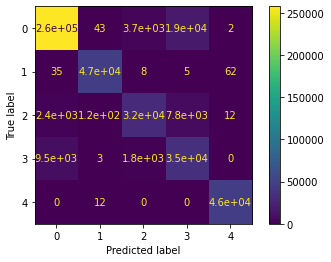

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test) 

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94    280443
           1       1.00      1.00      1.00     47150
           2       0.85      0.76      0.80     42306
           3       0.57      0.75      0.65     46156
           4       1.00      1.00      1.00     46445

    accuracy                           0.90    462500
   macro avg       0.87      0.89      0.88    462500
weighted avg       0.92      0.90      0.91    462500



### Classification using Random Forest Classifier

In [ ]:
## Random Forest Clasifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() # n_estimator = 100 , criteria =”gini”, Bootstrap = "True"
rf.fit(X_train, y_train.values.ravel())
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.94


In [ ]:
y_pred = rf.predict(X_test)

#### Metrics for Random Forest CLassifier

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    280443
           1       1.00      1.00      1.00     47150
           2       0.96      0.82      0.89     42306
           3       0.87      0.61      0.72     46156
           4       1.00      1.00      1.00     46445

    accuracy                           0.94    462500
   macro avg       0.95      0.89      0.91    462500
weighted avg       0.94      0.94      0.94    462500



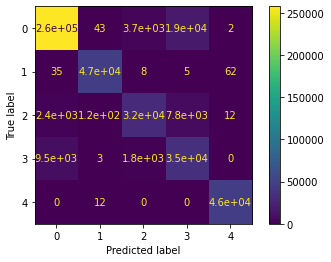

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test) 

In [ ]:
# ## Support Vector Machine (SVM)

# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train, y_train.values.ravel())
# print('Accuracy of SVM classifier on training set: {:.2f}'
#      .format(svm.score(X_train, y_train)))
# print('Accuracy of SVM classifier on test set: {:.2f}'
#      .format(svm.score(X_test, y_test)))